# **Práctica: Feature Engineering**

### El objetivo de esta Notebook es aplicar técnicas manuales de Feature Engineering.

### Se repasarán los procesos:

## 1.   EDA
## 2.   Data Cleaning
## 3.   Feature Engineering
## 4.   Future Selection


Dataset = https://www.kaggle.com/aungpyaeap/supermarket-sales

**Invoice id**: Computer generated sales slip invoice identification number
Branch: Branch of supercenter (3 branches are available identified by A, B and C).

**City:** Location of supercenters

**Customer type:** Type of customers, recorded by Members for customers using member card and Normal for without member card.

**Gender:** Gender type of customer

**Product line:** General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel

**Unit price:** Price of each product in $

**Quantity:** Number of products purchased by customer

**Tax:** 5% tax fee for customer buying

**Total:** Total price including tax

**Date:** Date of purchase (Record available from January 2019 to March 2019)

**Time:** Purchase time (10am to 9pm)

**Payment:**Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)

**COGS:** Cost of goods sold

**Gross margin percentage:** Gross margin percentage

**Gross income:** Gross income

**Rating:** Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

In [98]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [100]:
path = "drive/MyDrive/Meet Up/supermarket_sales - Sheet1.csv"
df = pd.read_csv(path)

In [4]:
df.head(3)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4


In [101]:
df.size

17000

# **¿Target?**

Depende del problema que queramos resolver:

**gross income:** Problema de regresión

**Rating:** Problema de clasificación

# **1° EDA: Exploratory Data Analysis**

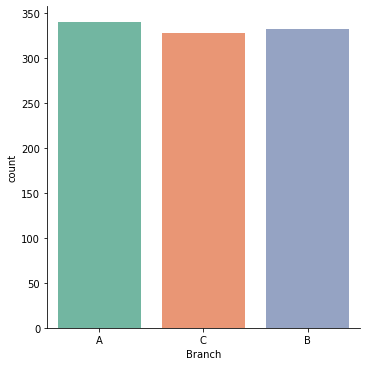

In [5]:
sns.catplot(x="Branch", kind="count", palette="Set2", data=df)

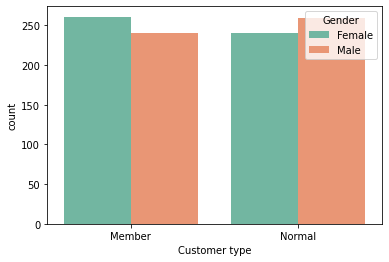

In [6]:
sns.countplot(x='Customer type', data= df, palette= "Set2",hue = "Gender")

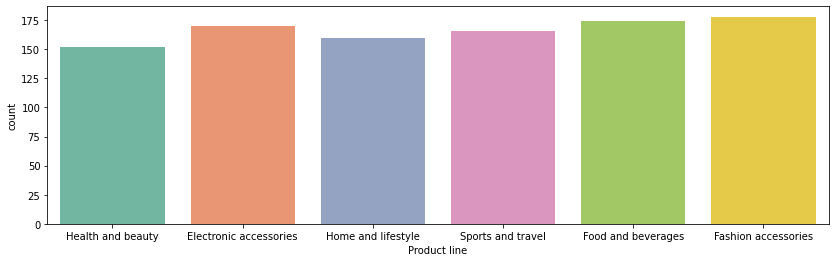

In [7]:
plt.figure(figsize=(14,4))
sns.countplot(x='Product line', data= df, palette= "Set2")

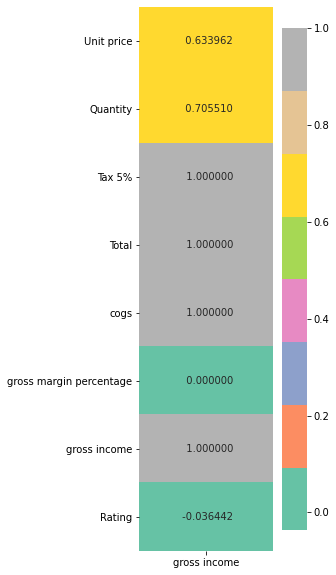

In [8]:
plt.figure(figsize=(3,10))
sns.heatmap(df.corr()[['gross income']], cmap="Set2", annot=True, fmt = '10f')

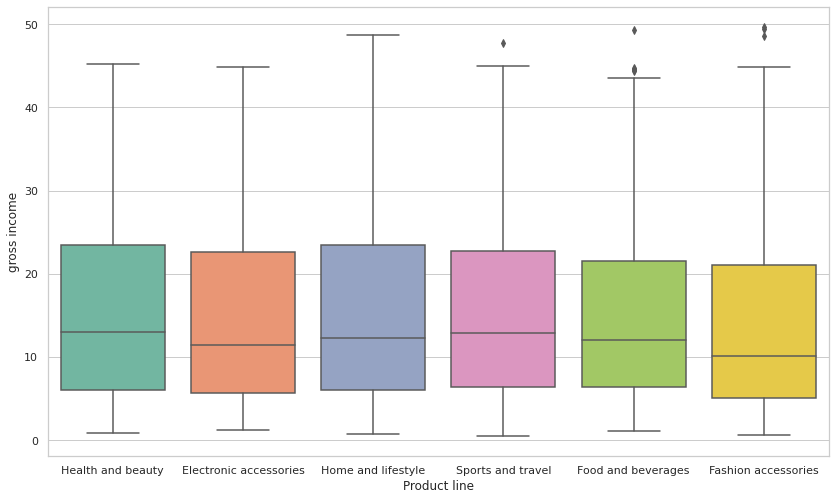

In [9]:
sns.set(rc={'figure.figsize':(14,8.27)}, style='whitegrid')
sns.boxplot(data=df,x='Product line', y='gross income', palette="Set2")

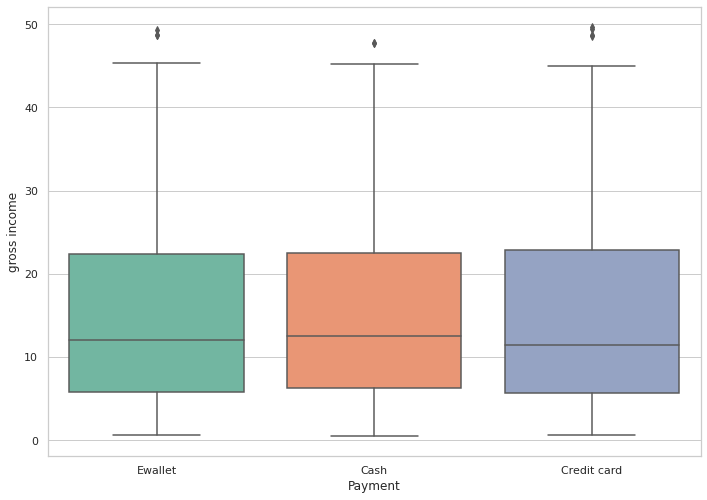

In [10]:
sns.set(rc={'figure.figsize':(11.7,8.27)}, style='whitegrid')
sns.boxplot(data=df, x='Payment', y='gross income', palette="Set2")

# **Imputation**

In [11]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

¿ Si hubieran nulo? ¿Qué decisiones tengo que tomar?

Generemos una copia del dataset, eliminamos algunos datos y prácticamos algunas de las técnicas de imputación mas populares

In [12]:
np.random.seed(2020)
to_delete = np.random.choice(1000,size=500, replace=True )
list_to_delete = to_delete.tolist()

In [13]:
copia_df = df
df_null = copia_df.loc[list_to_delete].replace(['Cash','Normal'], np.nan)
df_null.isnull().sum()
copia_df.loc[list_to_delete] = df_null
copia_df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,NaN,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,NaN,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,NaN,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,NaN,65.82,4.761905,3.2910,4.1


In [14]:
pd.set_option('mode.use_inf_as_na', True) 
copia_df.isnull().sum()

Invoice ID                   0
Branch                       0
City                         0
Customer type              201
Gender                       0
Product line                 0
Unit price                   0
Quantity                     0
Tax 5%                       0
Total                        0
Date                         0
Time                         0
Payment                    161
cogs                         0
gross margin percentage      0
gross income                 0
Rating                       0
dtype: int64

In [15]:
copia_df['Payment'].value_counts()

Ewallet        345
Credit card    311
Cash           183
Name: Payment, dtype: int64

In [16]:
copia_df['Customer type'].value_counts()

Member    501
Normal    298
Name: Customer type, dtype: int64

# Importante: NaN != 0

Cuando invocamos la función "isnull" esta solo cuenta los nulos, es decir que, si tenemos valores en 0 (cero) debemos revisarlos para definir si son correctos o no.

Una vez que tenemos los nulos identificados debemos tomar alguna de las siguientes decisiones:

> 1- Si los valores nulos corresponden, los dejamos y luego se ajustan con el modelo \
> 2- Si los valores nulos no corresponden, entonces debemos decidir si: \
>> a- Eliminarlos del dataset \
>> b- Imputarles algún valor: \
>>> I- 0 (cero) o cualquier valor fijo \
>>> II- Media o Mediana \
>>> III- MICE o KNN \

## Opción I : Completar con un valor fijo

In [17]:
copia_df['Payment']=copia_df['Payment'].fillna('Ewallet')
copia_df['Payment'].value_counts()

Ewallet        506
Credit card    311
Cash           183
Name: Payment, dtype: int64

Fillna cualquier valor


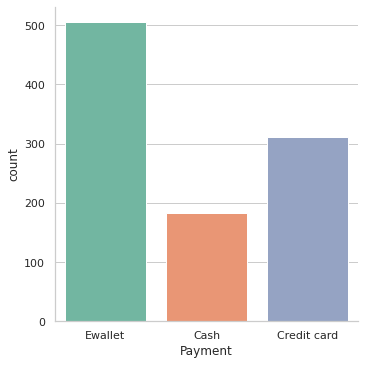

In [18]:
print("Fillna cualquier valor")
sns.catplot(x="Payment", kind="count", palette="Set2", data=copia_df)

## Opción II : Completar con la Media o Mediana o Moda

In [19]:
copia_df['Payment'].value_counts()

Ewallet        506
Credit card    311
Cash           183
Name: Payment, dtype: int64

En este caso la moda es Ewallet, la misma que completamos como valor fijo.

In [20]:
copia_df['Customer type'].value_counts()

Member    501
Normal    298
Name: Customer type, dtype: int64

In [21]:
copia_df['Customer type'] = copia_df['Customer type'].fillna('Normal')
copia_df['Customer type'].value_counts()

Member    501
Normal    499
Name: Customer type, dtype: int64

Fillna moda


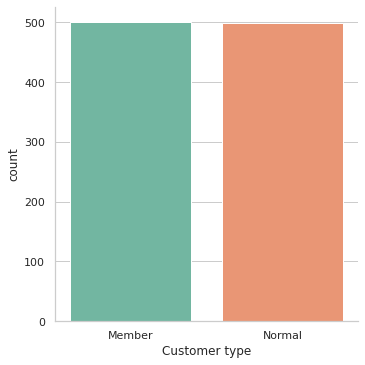

In [22]:
print("Fillna moda")
sns.catplot(x="Customer type", kind="count", palette="Set2", data=copia_df)

# Opción III: MICE o KNN

https://scikit-learn.org/stable/modules/impute.html

In [23]:
copia2_df = df
list_replace = copia2_df['Unit price']
df_null2 = copia2_df.loc[list_to_delete].replace([79.59, 76.82, 61.77], np.nan)
copia2_df.loc[list_to_delete] = df_null2
copia2_df.loc[list_to_delete].head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
864,124-31-1458,A,Yangon,Member,Female,Electronic accessories,NaN,3,11.9385,250.7085,1/8/2019,14:30,Ewallet,238.77,4.761905,11.9385,6.6
392,563-36-9814,A,Yangon,Member,Male,Electronic accessories,NaN,1,3.8410,80.6610,2/13/2019,18:27,Ewallet,NaN,4.761905,3.8410,7.2
323,563-91-7120,A,Yangon,Normal,Female,Fashion accessories,NaN,5,15.4425,324.2925,3/8/2019,13:21,Ewallet,308.85,4.761905,15.4425,6.7
630,149-61-1929,A,Yangon,Normal,Male,Sports and travel,64.19,10,32.0950,673.9950,1/19/2019,14:08,Credit card,641.90,4.761905,32.0950,6.7
707,162-65-8559,C,Naypyitaw,Member,Male,Food and beverages,68.98,1,3.4490,72.4290,1/21/2019,20:13,Ewallet,68.98,4.761905,3.4490,4.8


In [24]:
pd.set_option('mode.use_inf_as_na', True) 
copia2_df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 3
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       1
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [25]:
mask = copia2_df['Unit price'].isnull()
copia2_df[mask]

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
323,563-91-7120,A,Yangon,Normal,Female,Fashion accessories,NaN,5,15.4425,324.2925,3/8/2019,13:21,Ewallet,308.85,4.761905,15.4425,6.7
392,563-36-9814,A,Yangon,Member,Male,Electronic accessories,NaN,1,3.8410,80.6610,2/13/2019,18:27,Ewallet,NaN,4.761905,3.8410,7.2
864,124-31-1458,A,Yangon,Member,Female,Electronic accessories,NaN,3,11.9385,250.7085,1/8/2019,14:30,Ewallet,238.77,4.761905,11.9385,6.6


In [33]:
from sklearn.impute import KNNImputer
pd.set_option('mode.use_inf_as_na', True) 
df_null_knn = copia2_df[['Unit price',	'Quantity',	'Tax 5%',	'Total', 'cogs',	'gross margin percentage',	'gross income',	'Rating']]
nan = np.nan
imputer = KNNImputer(n_neighbors=2, weights="uniform")
imputer.fit_transform(df_null_knn)
df_null_knn_trans = imputer.transform(df_null_knn)
df_null_knn_clean = pd.DataFrame(df_null_knn_trans)
df_null_knn_clean.columns = ['Unit price',	'Quantity',	'Tax 5%',	'Total', 'cogs',	'gross margin percentage',	'gross income',	'Rating']
df_null_knn_clean.loc[list_to_delete].isnull().sum()

Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [27]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 3
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       1
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [107]:
# Por algún motivo se copiaron los nulos en df original, entonces lo relleno con el mismo que usamos de ejemplo)

df = df.fillna(df_null_knn_clean)
#df.isnull().sum()

# **Date-Time Decomposition**

El objetivo es desagregar la fecha entre variables númericas para que puedan ser tomadas por el modelo

In [50]:
df['Date'] = pd.to_datetime(df['Date'])
df[['Date']].head()

,Date
0,2019-01-05
1,2019-03-08
2,2019-03-03
3,2019-01-27
4,2019-02-08


In [51]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df[['Year','Month','Day']].head()

,Year,Month,Day
0,2019,1,5
1,2019,3,8
2,2019,3,3
3,2019,1,27
4,2019,2,8


# **Binning**

Esta técnica sirve para agrupar la información en grupos: \
Ej: \
>> Agrupar paises en continentes \
>> Agrupar números en pequeño, mediano, grande

In [52]:
df['Unit price'].describe()

count    997.000000
mean      55.620812
std       26.514455
min       10.080000
25%       32.800000
50%       55.040000
75%       77.930000
max       99.960000
Name: Unit price, dtype: float64

In [53]:
df['Bins'] = pd.cut(df['Unit price'], bins=[0, 25, 75, 100], labels=["Cheap", "Normal", "Expensive"])
df.head(3)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Year,Month,Day,Bins
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,2019,1,5,Normal
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,2019,3,8,Cheap
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,2019,3,3,Normal


# **Numeric Transformation**

Este tipo de transformación se lo utiliza principalmente para modelos de regresión lineal ya que son mas sensibles a la escalabilidad de las variables \
 \
Tipos: \
>> Logaritmica \
>> Estadística \
 
Ayudan a normalizar los datos y disminuir el impacto de los sesgos

## Transformación Logarítmica

Tomamos como ejemplo la columna "cogs", con el fin de agruparlas en 3 categorias: \

>> Cheap \
>> Normal \
>> Expensive

In [54]:
df['cogs_log'] = (df['cogs'] + 1).transform(np.log)
df.head(3)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Year,Month,Day,Bins,cogs_log
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,2019,1,5,Normal,6.261167
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,2019,3,8,Cheap,4.348987
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,2019,3,3,Normal,5.784779


Vemos la diferencia de distribución antes y despues de aplicar la transformación

In [55]:
def distribution_plotter(data, label, bins=None):    
    sns.set(rc={"figure.figsize": (10, 7)})
    sns.set_style("white")    
    dist = sns.distplot(data, bins= bins, hist_kws={'alpha':0.2}, kde_kws={'linewidth':5})
    dist.set_title('Distribucion de ' + label + '\n', fontsize=16)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


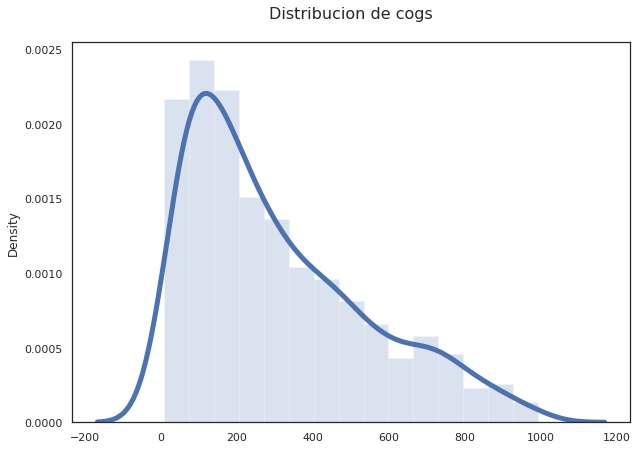

In [56]:
distribution_plotter(df[['cogs']],'cogs')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


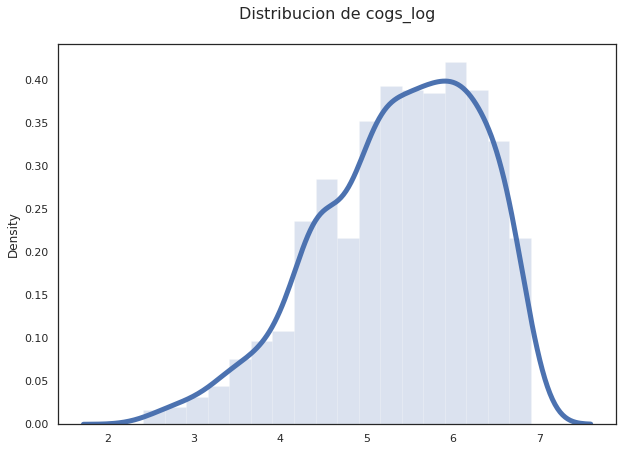

In [57]:
distribution_plotter(df[['cogs_log']],'cogs_log')

## Transformación Estadística

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.aggregate.html

https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.transform.html

Acá podemos usar tanto variables numericas como catergóricas y la idea es generar valores estadísticos para cada tipo de marca

In [58]:
grouped_df = df.groupby('Branch')

df[['tax_branch_mean','unit_price_mean']] = grouped_df[['Tax 5%', 'Unit price']].transform('mean')

df[['tax_branch_std','unit_price_std']] = grouped_df[['Tax 5%', 'Unit price']].transform('std')

df[['product_count','gender_count']] = grouped_df[['Product line', 'Gender']].transform('count')

In [59]:
df[['Branch', 'tax_branch_mean', 'unit_price_mean', 'tax_branch_std',
    'unit_price_std', 'product_count', 'gender_count']].head(10)

,Branch,tax_branch_mean,unit_price_mean,tax_branch_std,unit_price_std,product_count,gender_count
0,A,14.874001,54.621098,11.030477,26.182759,340,340
1,C,16.052367,56.609024,12.531470,27.179799,328,328
2,A,14.874001,54.621098,11.030477,26.182759,340,340
3,A,14.874001,54.621098,11.030477,26.182759,340,340
4,A,14.874001,54.621098,11.030477,26.182759,340,340
5,C,16.052367,56.609024,12.531470,27.179799,328,328
6,A,14.874001,54.621098,11.030477,26.182759,340,340
7,C,16.052367,56.609024,12.531470,27.179799,328,328
8,A,14.874001,54.621098,11.030477,26.182759,340,340
9,B,15.232024,55.659277,11.545122,26.224559,332,332


In [60]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Year,Month,Day,Bins,cogs_log,tax_branch_mean,unit_price_mean,tax_branch_std,unit_price_std,product_count,gender_count
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,2019,1,5,Normal,6.261167,14.874001,54.621098,11.030477,26.182759,340,340
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,2019,3,8,Cheap,4.348987,16.052367,56.609024,12.531470,27.179799,328,328
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,2019,3,3,Normal,5.784779,14.874001,54.621098,11.030477,26.182759,340,340
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,2019,1,27,Normal,6.145815,14.874001,54.621098,11.030477,26.182759,340,340
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2019,2,8,Expensive,6.405509,14.874001,54.621098,11.030477,26.182759,340,340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,13:46,Ewallet,40.35,4.761905,2.0175,6.2,2019,1,29,Normal,3.722072,16.052367,56.609024,12.531470,27.179799,328,328
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,17:16,Ewallet,973.80,4.761905,48.6900,4.4,2019,3,2,Expensive,6.882232,15.232024,55.659277,11.545122,26.224559,332,332
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,13:22,Cash,31.84,4.761905,1.5920,7.7,2019,2,9,Normal,3.491647,14.874001,54.621098,11.030477,26.182759,340,340
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,15:33,Ewallet,65.82,4.761905,3.2910,4.1,2019,2,22,Normal,4.202002,14.874001,54.621098,11.030477,26.182759,340,340


# Categorical encoding


Este paso nos va a preparar para luego generar las variables dummies sobre las categóricas

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               997 non-null    float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

In [62]:
df["Branch"] = df["Branch"].astype('category')
df["City"] = df["City"].astype('category')
df["Customer type"] = df["Customer type"].astype('category')
df["Gender"] = df["Gender"].astype('category')
df["Product line"] = df["Product line"].astype('category')
df["Payment"] = df["Payment"].astype('category')
df.dtypes

Invoice ID                         object
Branch                           category
City                             category
Customer type                    category
Gender                           category
Product line                     category
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                               object
Payment                          category
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
Year                                int64
Month                               int64
Day                                 int64
Bins                             category
cogs_log                          float64
tax_branch_mean                   float64
unit_price_mean                   

In [63]:
df = df.drop(columns=['Invoice ID', 'Date','Time'])

# Dummies / One-Hot encoding

In [64]:
df_dummies = pd.get_dummies(df)
df_dummies


,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Year,Month,Day,cogs_log,tax_branch_mean,unit_price_mean,tax_branch_std,unit_price_std,product_count,gender_count,Branch_A,Branch_B,Branch_C,City_Mandalay,City_Naypyitaw,City_Yangon,Customer type_Member,Customer type_Normal,Gender_Female,Gender_Male,Product line_Electronic accessories,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,Payment_Cash,Payment_Credit card,Payment_Ewallet,Bins_Cheap,Bins_Normal,Bins_Expensive
0,74.69,7,26.1415,548.9715,522.83,4.761905,26.1415,9.1,2019,1,5,6.261167,14.874001,54.621098,11.030477,26.182759,340,340,1,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
1,15.28,5,3.8200,80.2200,76.40,4.761905,3.8200,9.6,2019,3,8,4.348987,16.052367,56.609024,12.531470,27.179799,328,328,0,0,1,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0
2,46.33,7,16.2155,340.5255,324.31,4.761905,16.2155,7.4,2019,3,3,5.784779,14.874001,54.621098,11.030477,26.182759,340,340,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0
3,58.22,8,23.2880,489.0480,465.76,4.761905,23.2880,8.4,2019,1,27,6.145815,14.874001,54.621098,11.030477,26.182759,340,340,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0
4,86.31,7,30.2085,634.3785,604.17,4.761905,30.2085,5.3,2019,2,8,6.405509,14.874001,54.621098,11.030477,26.182759,340,340,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,40.35,1,2.0175,42.3675,40.35,4.761905,2.0175,6.2,2019,1,29,3.722072,16.052367,56.609024,12.531470,27.179799,328,328,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0
996,97.38,10,48.6900,1022.4900,973.80,4.761905,48.6900,4.4,2019,3,2,6.882232,15.232024,55.659277,11.545122,26.224559,332,332,0,1,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,1
997,31.84,1,1.5920,33.4320,31.84,4.761905,1.5920,7.7,2019,2,9,3.491647,14.874001,54.621098,11.030477,26.182759,340,340,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
998,65.82,1,3.2910,69.1110,65.82,4.761905,3.2910,4.1,2019,2,22,4.202002,14.874001,54.621098,11.030477,26.182759,340,340,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0


In [65]:
df = pd.concat([df_dummies])
df

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Year,Month,Day,cogs_log,tax_branch_mean,unit_price_mean,tax_branch_std,unit_price_std,product_count,gender_count,Branch_A,Branch_B,Branch_C,City_Mandalay,City_Naypyitaw,City_Yangon,Customer type_Member,Customer type_Normal,Gender_Female,Gender_Male,Product line_Electronic accessories,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,Payment_Cash,Payment_Credit card,Payment_Ewallet,Bins_Cheap,Bins_Normal,Bins_Expensive
0,74.69,7,26.1415,548.9715,522.83,4.761905,26.1415,9.1,2019,1,5,6.261167,14.874001,54.621098,11.030477,26.182759,340,340,1,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
1,15.28,5,3.8200,80.2200,76.40,4.761905,3.8200,9.6,2019,3,8,4.348987,16.052367,56.609024,12.531470,27.179799,328,328,0,0,1,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0
2,46.33,7,16.2155,340.5255,324.31,4.761905,16.2155,7.4,2019,3,3,5.784779,14.874001,54.621098,11.030477,26.182759,340,340,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0
3,58.22,8,23.2880,489.0480,465.76,4.761905,23.2880,8.4,2019,1,27,6.145815,14.874001,54.621098,11.030477,26.182759,340,340,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0
4,86.31,7,30.2085,634.3785,604.17,4.761905,30.2085,5.3,2019,2,8,6.405509,14.874001,54.621098,11.030477,26.182759,340,340,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,40.35,1,2.0175,42.3675,40.35,4.761905,2.0175,6.2,2019,1,29,3.722072,16.052367,56.609024,12.531470,27.179799,328,328,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0
996,97.38,10,48.6900,1022.4900,973.80,4.761905,48.6900,4.4,2019,3,2,6.882232,15.232024,55.659277,11.545122,26.224559,332,332,0,1,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,1
997,31.84,1,1.5920,33.4320,31.84,4.761905,1.5920,7.7,2019,2,9,3.491647,14.874001,54.621098,11.030477,26.182759,340,340,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
998,65.82,1,3.2910,69.1110,65.82,4.761905,3.2910,4.1,2019,2,22,4.202002,14.874001,54.621098,11.030477,26.182759,340,340,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0


# **Feature selection**

In [66]:
y = df['gross income']
X = df.drop('gross income', axis=1)

# SelectKBest

In [68]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [73]:
df = df.dropna()

In [93]:
y = df['gross income'].astype(int)
X = df.drop('gross income', axis=1).astype(int)

bestfeatures = SelectKBest(score_func=chi2, k=20)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(20,'Score')) 



                                  Specs          Score
3                                 Total  186805.055877
4                                  cogs  177939.966609
2                                Tax 5%    9203.282362
0                            Unit price    5797.440393
1                              Quantity     879.347709
38                       Bins_Expensive     259.831950
36                           Bins_Cheap     228.589649
9                                   Day     189.990093
10                             cogs_log     181.052147
37                          Bins_Normal      97.381328
28     Product line_Fashion accessories      51.850509
31      Product line_Home and lifestyle      43.369417
33                         Payment_Cash      41.013876
30       Product line_Health and beauty      39.099418
29      Product line_Food and beverages      36.467873
27  Product line_Electronic accessories      33.051735
6                                Rating      29.475248
34        

# **Heatmap**

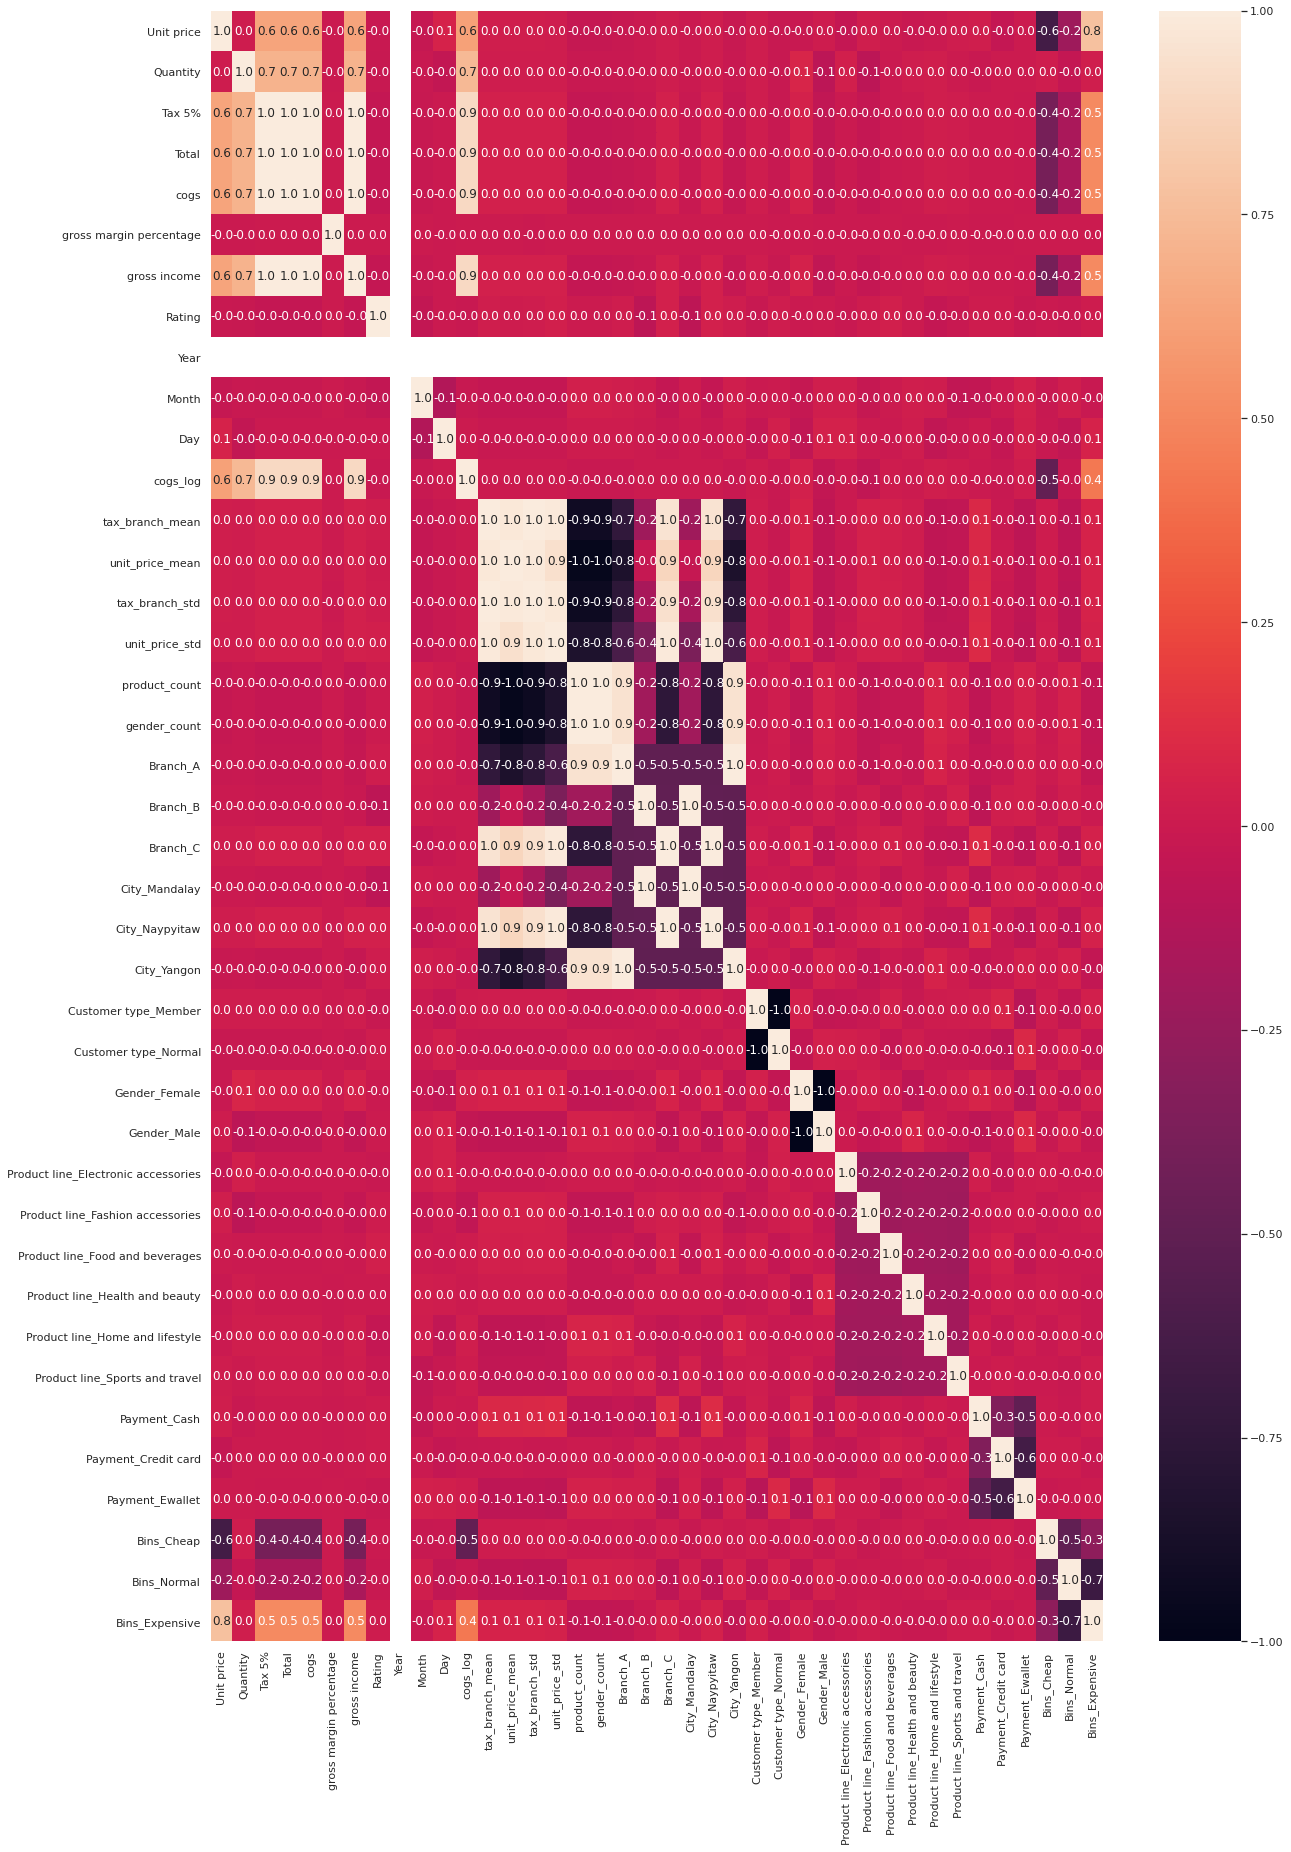

In [76]:
plt.figure(figsize=(20, 30))
sns.heatmap(df.corr(),annot=True, fmt='0.1f')

# **Feature selection**

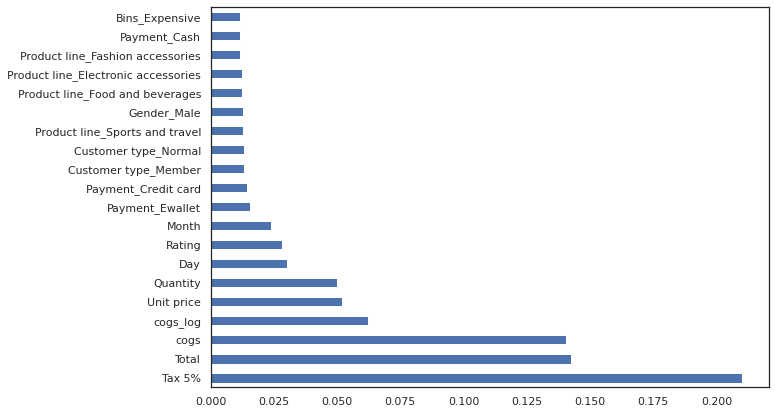

In [97]:
from sklearn.ensemble import ExtraTreesClassifier


model = ExtraTreesClassifier()
model.fit(X,y)


feat_importances = pd.Series(model.feature_importances_,index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()